In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')

In [4]:
df_min=df[df['8']==1]

In [5]:
df_min.to_csv('yeast1_minority_train.csv',index=False)
df_min=pd.read_csv('yeast1_minority_train.csv')

In [6]:
df_majority=df[df['8']==0]
df_majority.to_csv('yeast1_majority_train.csv',index=False)
df_majority=pd.read_csv('yeast1_majority_train.csv')

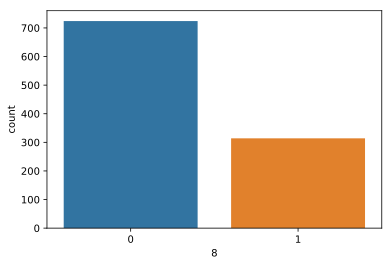

In [7]:
%matplotlib inline
sns.countplot(x='8',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(308, 5, 9)
(308, 9)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(9))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2400      
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 189       
Total params: 2,589
Trainable params: 2,589
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=1000,verbose=1)

Epoch 1/1000
184/184 [==============================] - 3s 15ms/step - loss: 0.1671
Epoch 2/1000
184/184 [==============================] - 0s 589us/step - loss: 0.1405
Epoch 3/1000
184/184 [==============================] - 0s 616us/step - loss: 0.1156
Epoch 4/1000
184/184 [==============================] - 0s 507us/step - loss: 0.0917
Epoch 5/1000
184/184 [==============================] - 0s 582us/step - loss: 0.0690
Epoch 6/1000
184/184 [==============================] - 0s 529us/step - loss: 0.0487
Epoch 7/1000
184/184 [==============================] - 0s 589us/step - loss: 0.0320
Epoch 8/1000
184/184 [==============================] - 0s 512us/step - loss: 0.0217
Epoch 9/1000
184/184 [==============================] - 0s 560us/step - loss: 0.0181
Epoch 10/1000
184/184 [==============================] - 0s 529us/step - loss: 0.0177
Epoch 11/1000
184/184 [==============================] - 0s 534us/step - loss: 0.0177
Epoch 12/1000
184/184 [==============================] - 0s 681u

184/184 [==============================] - 0s 630us/step - loss: 0.0160
Epoch 97/1000
184/184 [==============================] - 0s 678us/step - loss: 0.0160
Epoch 98/1000
184/184 [==============================] - 0s 632us/step - loss: 0.0160
Epoch 99/1000
184/184 [==============================] - 0s 575us/step - loss: 0.0160
Epoch 100/1000
184/184 [==============================] - 0s 558us/step - loss: 0.0159
Epoch 101/1000
184/184 [==============================] - 0s 518us/step - loss: 0.0159
Epoch 102/1000
184/184 [==============================] - 0s 513us/step - loss: 0.0159
Epoch 103/1000
184/184 [==============================] - 0s 569us/step - loss: 0.0160
Epoch 104/1000
184/184 [==============================] - 0s 523us/step - loss: 0.0159
Epoch 105/1000
184/184 [==============================] - 0s 526us/step - loss: 0.0159
Epoch 106/1000
184/184 [==============================] - 0s 539us/step - loss: 0.0159
Epoch 107/1000
184/184 [==============================] - 0s 

184/184 [==============================] - 0s 561us/step - loss: 0.0156
Epoch 191/1000
184/184 [==============================] - 0s 550us/step - loss: 0.0156
Epoch 192/1000
184/184 [==============================] - 0s 550us/step - loss: 0.0156
Epoch 193/1000
184/184 [==============================] - 0s 512us/step - loss: 0.0157
Epoch 194/1000
184/184 [==============================] - 0s 523us/step - loss: 0.0156
Epoch 195/1000
184/184 [==============================] - 0s 517us/step - loss: 0.0156
Epoch 196/1000
184/184 [==============================] - 0s 594us/step - loss: 0.0156
Epoch 197/1000
184/184 [==============================] - 0s 526us/step - loss: 0.0156
Epoch 198/1000
184/184 [==============================] - 0s 523us/step - loss: 0.0156
Epoch 199/1000
184/184 [==============================] - 0s 512us/step - loss: 0.0156
Epoch 200/1000
184/184 [==============================] - 0s 559us/step - loss: 0.0156
Epoch 201/1000
184/184 [==============================] - 

184/184 [==============================] - 0s 539us/step - loss: 0.0155
Epoch 285/1000
184/184 [==============================] - 0s 512us/step - loss: 0.0153
Epoch 286/1000
184/184 [==============================] - 0s 545us/step - loss: 0.0154
Epoch 287/1000
184/184 [==============================] - 0s 518us/step - loss: 0.0154
Epoch 288/1000
184/184 [==============================] - 0s 541us/step - loss: 0.0154
Epoch 289/1000
184/184 [==============================] - 0s 548us/step - loss: 0.0154
Epoch 290/1000
184/184 [==============================] - 0s 553us/step - loss: 0.0153
Epoch 291/1000
184/184 [==============================] - 0s 508us/step - loss: 0.0153
Epoch 292/1000
184/184 [==============================] - 0s 545us/step - loss: 0.0153
Epoch 293/1000
184/184 [==============================] - 0s 545us/step - loss: 0.0153
Epoch 294/1000
184/184 [==============================] - ETA: 0s - loss: 0.015 - 0s 518us/step - loss: 0.0153
Epoch 295/1000
184/184 [==========

184/184 [==============================] - 0s 899us/step - loss: 0.0151
Epoch 378/1000
184/184 [==============================] - 0s 676us/step - loss: 0.0151
Epoch 379/1000
184/184 [==============================] - 0s 681us/step - loss: 0.0151
Epoch 380/1000
184/184 [==============================] - 0s 979us/step - loss: 0.0151
Epoch 381/1000
184/184 [==============================] - 0s 812us/step - loss: 0.0151
Epoch 382/1000
184/184 [==============================] - 0s 924us/step - loss: 0.0151
Epoch 383/1000
184/184 [==============================] - 0s 733us/step - loss: 0.0151
Epoch 384/1000
184/184 [==============================] - 0s 685us/step - loss: 0.0151
Epoch 385/1000
184/184 [==============================] - 0s 640us/step - loss: 0.0151
Epoch 386/1000
184/184 [==============================] - 0s 595us/step - loss: 0.0151
Epoch 387/1000
184/184 [==============================] - 0s 605us/step - loss: 0.0151
Epoch 388/1000
184/184 [==============================] - 

184/184 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 472/1000
184/184 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 473/1000
184/184 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 474/1000
184/184 [==============================] - 0s 1ms/step - loss: 0.0149A: 0s - loss: 0.01
Epoch 475/1000
184/184 [==============================] - 0s 1ms/step - loss: 0.0149A: 0s - loss: 0.014
Epoch 476/1000
184/184 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 477/1000
184/184 [==============================] - 0s 945us/step - loss: 0.0148
Epoch 478/1000
184/184 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 479/1000
184/184 [==============================] - 0s 992us/step - loss: 0.0149
Epoch 480/1000
184/184 [==============================] - 0s 769us/step - loss: 0.0149
Epoch 481/1000
184/184 [==============================] - 0s 727us/step - loss: 0.0149
Epoch 482/1000
184/184 [===========

184/184 [==============================] - 0s 687us/step - loss: 0.0147
Epoch 565/1000
184/184 [==============================] - 0s 714us/step - loss: 0.0147
Epoch 566/1000
184/184 [==============================] - 0s 632us/step - loss: 0.0147
Epoch 567/1000
184/184 [==============================] - 0s 643us/step - loss: 0.0147
Epoch 568/1000
184/184 [==============================] - 0s 665us/step - loss: 0.0147
Epoch 569/1000
184/184 [==============================] - 0s 651us/step - loss: 0.0146
Epoch 570/1000
184/184 [==============================] - 0s 668us/step - loss: 0.0147
Epoch 571/1000
184/184 [==============================] - 0s 699us/step - loss: 0.0146
Epoch 572/1000
184/184 [==============================] - 0s 616us/step - loss: 0.0147
Epoch 573/1000
184/184 [==============================] - 0s 638us/step - loss: 0.0148
Epoch 574/1000
184/184 [==============================] - 0s 632us/step - loss: 0.0147
Epoch 575/1000
184/184 [==============================] - 

184/184 [==============================] - 0s 774us/step - loss: 0.0145
Epoch 659/1000
184/184 [==============================] - 0s 951us/step - loss: 0.0145
Epoch 660/1000
184/184 [==============================] - 0s 752us/step - loss: 0.0145
Epoch 661/1000
184/184 [==============================] - 0s 771us/step - loss: 0.0145
Epoch 662/1000
184/184 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 663/1000
184/184 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 664/1000
184/184 [==============================] - 0s 886us/step - loss: 0.0145
Epoch 665/1000
184/184 [==============================] - 0s 744us/step - loss: 0.0145
Epoch 666/1000
184/184 [==============================] - 0s 776us/step - loss: 0.0145
Epoch 667/1000
184/184 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 668/1000
184/184 [==============================] - 0s 962us/step - loss: 0.0145
Epoch 669/1000
184/184 [==============================] - 0s 932

184/184 [==============================] - 0s 692us/step - loss: 0.0144
Epoch 753/1000
184/184 [==============================] - 0s 632us/step - loss: 0.0143
Epoch 754/1000
184/184 [==============================] - 0s 648us/step - loss: 0.0143
Epoch 755/1000
184/184 [==============================] - 0s 634us/step - loss: 0.0144
Epoch 756/1000
184/184 [==============================] - 0s 665us/step - loss: 0.0143
Epoch 757/1000
184/184 [==============================] - 0s 651us/step - loss: 0.0143
Epoch 758/1000
184/184 [==============================] - 0s 649us/step - loss: 0.0143
Epoch 759/1000
184/184 [==============================] - 0s 632us/step - loss: 0.0143
Epoch 760/1000
184/184 [==============================] - 0s 627us/step - loss: 0.0143
Epoch 761/1000
184/184 [==============================] - 0s 623us/step - loss: 0.0143
Epoch 762/1000
184/184 [==============================] - 0s 701us/step - loss: 0.0142
Epoch 763/1000
184/184 [==============================] - 

184/184 [==============================] - 0s 646us/step - loss: 0.0142
Epoch 846/1000
184/184 [==============================] - 0s 616us/step - loss: 0.0141
Epoch 847/1000
184/184 [==============================] - 0s 599us/step - loss: 0.0142
Epoch 848/1000
184/184 [==============================] - 0s 632us/step - loss: 0.0142
Epoch 849/1000
184/184 [==============================] - 0s 641us/step - loss: 0.0141
Epoch 850/1000
184/184 [==============================] - 0s 603us/step - loss: 0.0141
Epoch 851/1000
184/184 [==============================] - 0s 616us/step - loss: 0.0141
Epoch 852/1000
184/184 [==============================] - 0s 605us/step - loss: 0.0141
Epoch 853/1000
184/184 [==============================] - 0s 638us/step - loss: 0.0141
Epoch 854/1000
184/184 [==============================] - 0s 605us/step - loss: 0.0141
Epoch 855/1000
184/184 [==============================] - 0s 610us/step - loss: 0.0141
Epoch 856/1000
184/184 [==============================] - 

184/184 [==============================] - 0s 850us/step - loss: 0.0139
Epoch 940/1000
184/184 [==============================] - 0s 799us/step - loss: 0.0139
Epoch 941/1000
184/184 [==============================] - 0s 801us/step - loss: 0.0139
Epoch 942/1000
184/184 [==============================] - 0s 695us/step - loss: 0.0139
Epoch 943/1000
184/184 [==============================] - 0s 730us/step - loss: 0.0139
Epoch 944/1000
184/184 [==============================] - 0s 708us/step - loss: 0.0142
Epoch 945/1000
184/184 [==============================] - 0s 779us/step - loss: 0.0141
Epoch 946/1000
184/184 [==============================] - 0s 714us/step - loss: 0.0140
Epoch 947/1000
184/184 [==============================] - 0s 756us/step - loss: 0.0139
Epoch 948/1000
184/184 [==============================] - 0s 738us/step - loss: 0.0140
Epoch 949/1000
184/184 [==============================] - 0s 719us/step - loss: 0.0140
Epoch 950/1000
184/184 [==============================] - 

In [14]:
model.save('yeast1.h5')

In [15]:
Xtrain.shape

(184, 5, 9)

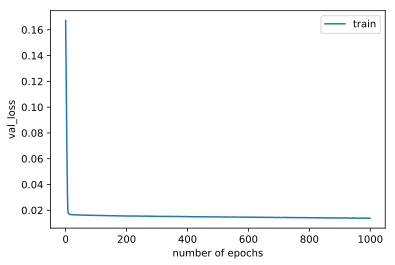

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

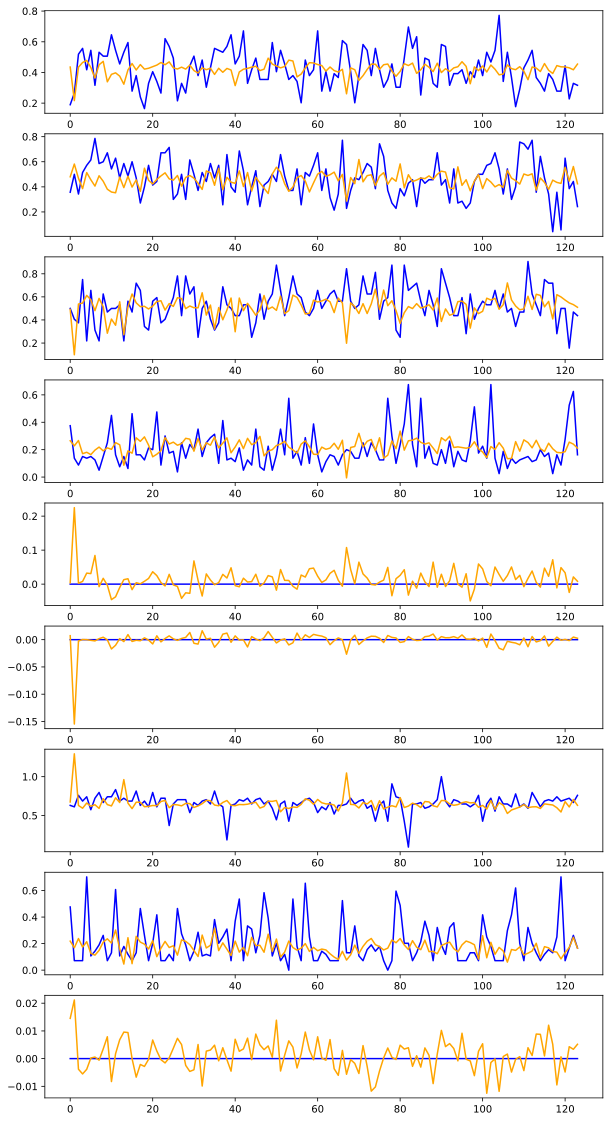

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 0.43529674,  0.48010516,  0.49152538, ...,  0.6738547 ,
         0.21866259,  0.01451813],
       [ 0.21670976,  0.58176285,  0.09859422, ...,  1.294125  ,
         0.16839807,  0.02115541],
       [ 0.43458864,  0.46854836,  0.5379892 , ...,  0.6291593 ,
         0.2381526 , -0.00382813],
       ...,
       [ 0.43041223,  0.44554424,  0.54778475, ...,  0.60971475,
         0.17039755,  0.0042978 ],
       [ 0.41761908,  0.56213266,  0.5329479 , ...,  0.70548904,
         0.24733196,  0.00336558],
       [ 0.45459032,  0.42448038,  0.50997466, ...,  0.6306155 ,
         0.16555293,  0.00517311]], dtype=float32)

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

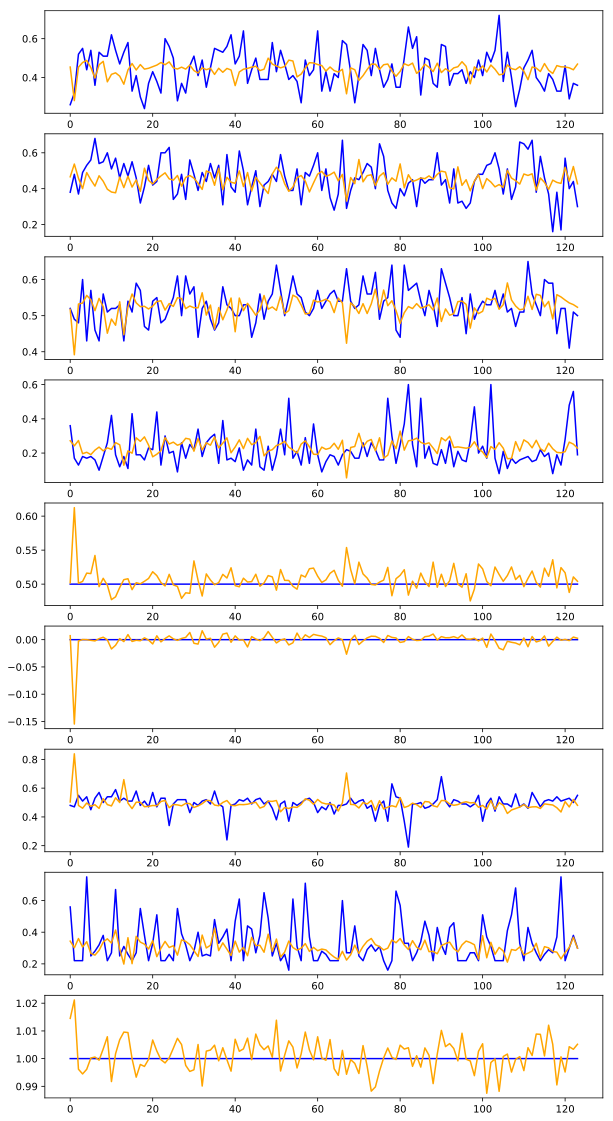

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 0.43529674,  0.48010516,  0.49152538, ...,  0.6738547 ,
         0.21866259,  0.01451813],
       [ 0.21670976,  0.58176285,  0.09859422, ...,  1.294125  ,
         0.16839807,  0.02115541],
       [ 0.43458864,  0.46854836,  0.5379892 , ...,  0.6291593 ,
         0.2381526 , -0.00382813],
       ...,
       [ 0.43041223,  0.44554424,  0.54778475, ...,  0.60971475,
         0.17039755,  0.0042978 ],
       [ 0.41761908,  0.56213266,  0.5329479 , ...,  0.70548904,
         0.24733196,  0.00336558],
       [ 0.45459032,  0.42448038,  0.50997466, ...,  0.6306155 ,
         0.16555293,  0.00517311]], dtype=float32)

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1.csv',index=False)